# Tutorial: Linear Regression in TensorFlow - Case of air quality analysis. 
#### Part. 1 Supplementing data for further analysis

### <span style="color:#1155cc">AirQualityUCI</span>

Source of data: https://archive.ics.uci.edu/ml/datasets/Air+Quality

In [1]:
import pandas as pd
df = pd.read_csv('c:/TS/AirQualityUCI.csv', sep=';')
df.head(3)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN


### <span style="color:#1155cc">Data Set Information:</span>



<span style="color:#1155cc">
The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level,within an Italian city. Data were recorded from March 2004 to February 2005 (one year)representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) and were provided by a co-located reference certified analyzer. Evidences of cross-sensitivities as well as both concept and sensor drifts are present as described in De Vito et al., Sens. And Act. B, Vol. 129,2,2008 (citation required) eventually affecting sensors concentration estimation capabilities. Missing values are tagged with -200 value.
This dataset can be used exclusively for research purposes. Commercial purposes are fully excluded.</span>

<span style="color:#f3f3f3">Supplementing data for further analysis</span>

### <span style="color:#1155cc"> Attribute Information:</span>

    Date (DD/MM/YYYY)
    Time (HH.MM.SS)
    True hourly averaged concentration CO in mg/m^3 (reference analyzer)
    PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)
    True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)
    True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)
    PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)
    True hourly averaged NOx concentration in ppb (reference analyzer)
    PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted)
    True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)
    PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)
    PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)
    Temperature in Â°C
    Relative Humidity (%)
    AH Absolute Humidity


<span style="color:#f3f3f3">Tutorial: Supplementing data for further analysis
</span>

<span style="color:#1155cc">Step 1. Data completeness check</span>

In [2]:
df.isnull().sum()

Date              114
Time              114
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                114
AH                114
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64


There are a lot of missing values. In addition, we learned that the value -200 means no data. We'll deal with this in a moment. We will now check the statistics of variables in the database.

In [3]:
df.agg(['min', 'max', 'mean', 'median'])

C:\ProgramData\Anaconda3\envs\OLD_TF\lib\site-packages\numpy\lib\nanfunctions.py:1112: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


,PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),Unnamed: 15,Unnamed: 16
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,NaN,NaN
max,2040.000000,1189.000000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,NaN,NaN
mean,1048.990061,-159.090093,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,NaN,NaN
median,1053.000000,-200.000000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,NaN,NaN


In [4]:
df.shape

(9471, 17)

We delete two empty columns.

In [5]:
del df['Unnamed: 15']
del df['Unnamed: 16']

## <span style="color:darkgreen">Step 1: Preliminary analysis of data gaps</span>

One more look at how many NaN cells there are.

In [6]:
df.isnull().sum()

Date             114
Time             114
CO(GT)           114
PT08.S1(CO)      114
NMHC(GT)         114
C6H6(GT)         114
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
T                114
RH               114
AH               114
dtype: int64

Now I will try to see these empty cells.

In [7]:
df[df['NMHC(GT)'].isnull()]

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


These are completely empty time series. The device was probably cut off from the power supply, no sensor was working.

In [8]:
df = df.dropna(how='all')
df.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

We are looking for variables with the value -200 because this means there is no data. The -200 values are entered differently, so I have to do the replacement process in many ways.

In [9]:
import numpy as np

df = df.replace(-200,np.NaN)
df = df.replace('-200',np.NaN)
df = df.replace('-200.0',np.NaN)
df = df.replace('-200,0',np.NaN)

The value of -200 has been changed to NaN and we will see how many empty records there are now.

In [10]:
df.isnull().sum()

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

Chart of missing data structure.

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

The NMHC (GT) variable is the most incomplete, we eliminate it from research

In [12]:
del df['NMHC(GT)']

We displaying records with missing data - Function isna ()

In [13]:
df1 = df[df.isna().any(axis=1)]
df1

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9,11/03/2004,03.00.00,"0,6",1010.0,"1,7",561.0,NaN,1705.0,NaN,1235.0,501.0,"10,3","60,2","0,7517"
10,11/03/2004,04.00.00,NaN,1011.0,"1,3",527.0,21.0,1818.0,34.0,1197.0,445.0,"10,1","60,5","0,7465"
33,12/03/2004,03.00.00,"0,8",889.0,"1,9",574.0,NaN,1680.0,NaN,1187.0,512.0,"7,0","62,3","0,6261"
34,12/03/2004,04.00.00,NaN,831.0,"1,1",506.0,21.0,1893.0,32.0,1134.0,384.0,"6,1","65,9","0,6248"
39,12/03/2004,09.00.00,NaN,1545.0,"22,1",1353.0,NaN,767.0,NaN,2058.0,1588.0,"9,2","56,2","0,6561"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9058,23/03/2005,04.00.00,NaN,993.0,"2,3",604.0,85.0,848.0,65.0,1160.0,762.0,"14,5","66,4","1,0919"
9130,26/03/2005,04.00.00,NaN,1122.0,"6,0",811.0,181.0,641.0,92.0,1336.0,1122.0,"16,2","71,2","1,3013"
9202,29/03/2005,04.00.00,NaN,883.0,"1,3",530.0,63.0,997.0,46.0,1102.0,617.0,"13,7","68,2","1,0611"
9274,01/04/2005,04.00.00,NaN,818.0,"0,8",473.0,47.0,1257.0,41.0,898.0,323.0,"13,7","48,8","0,7606"


## <span style="color:darkgreen">Step 2: Check the level of direct correlation to complete the data</span>
CO (GT) there is no data there every few measurements, you have to check what this variable correlates with. I check the data type to make a correlation.

In [14]:
df.dtypes

Date              object
Time              object
CO(GT)            object
PT08.S1(CO)      float64
C6H6(GT)          object
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                 object
RH                object
AH                object
dtype: object

In [15]:
# df['CO(GT)'].astype(float)

<span style="color:red">ValueError: could not convert string to float: '2,6'</span>

It turns out that it is not so easy to convert text to number format - the problem is in commas. We replace commas with dots.

In [16]:
df['CO(GT)'] = df['CO(GT)'].str.replace(',','.')
df['C6H6(GT)'] = df['C6H6(GT)'].str.replace(',','.')
df['T'] = df['T'].str.replace(',','.')
df['RH'] = df['RH'].str.replace(',','.')
df['AH'] = df['AH'].str.replace(',','.')

<span style="color:darkblue">We change the format from object to float </span>

In [17]:
df[['CO(GT)','C6H6(GT)', 'T','RH','AH']] = df[['CO(GT)','C6H6(GT)', 'T','RH','AH']].astype(float)

In [18]:
df.dtypes

Date              object
Time              object
CO(GT)           float64
PT08.S1(CO)      float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object

<span style="color:darkblue">We can now check the level of direct correlation.</span>

In [19]:
df.corr()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
CO(GT),1.000000,0.879288,0.931078,0.915514,0.795028,-0.703446,0.683343,0.630703,0.854182,0.022109,0.048890,0.048556
PT08.S1(CO),0.879288,1.000000,0.883795,0.892964,0.713654,-0.771938,0.641529,0.682881,0.899324,0.048627,0.114606,0.135324
C6H6(GT),0.931078,0.883795,1.000000,0.981950,0.718839,-0.735744,0.614474,0.765731,0.865689,0.198956,-0.061681,0.167972
PT08.S2(NMHC),0.915514,0.892964,0.981950,1.000000,0.704435,-0.796703,0.646245,0.777254,0.880578,0.241373,-0.090380,0.186933
NOx(GT),0.795028,0.713654,0.718839,0.704435,1.000000,-0.655707,0.763111,0.233731,0.787046,-0.269683,0.221032,-0.149323
PT08.S3(NOx),-0.703446,-0.771938,-0.735744,-0.796703,-0.655707,1.000000,-0.652083,-0.538468,-0.796569,-0.145112,-0.056740,-0.232017
NO2(GT),0.683343,0.641529,0.614474,0.646245,0.763111,-0.652083,1.000000,0.157360,0.708128,-0.186533,-0.091759,-0.335022
PT08.S4(NO2),0.630703,0.682881,0.765731,0.777254,0.233731,-0.538468,0.157360,1.000000,0.591144,0.561270,-0.032188,0.629641
PT08.S5(O3),0.854182,0.899324,0.865689,0.880578,0.787046,-0.796569,0.708128,0.591144,1.000000,-0.027172,0.124956,0.070751
T,0.022109,0.048627,0.198956,0.241373,-0.269683,-0.145112,-0.186533,0.561270,-0.027172,1.000000,-0.578621,0.656397


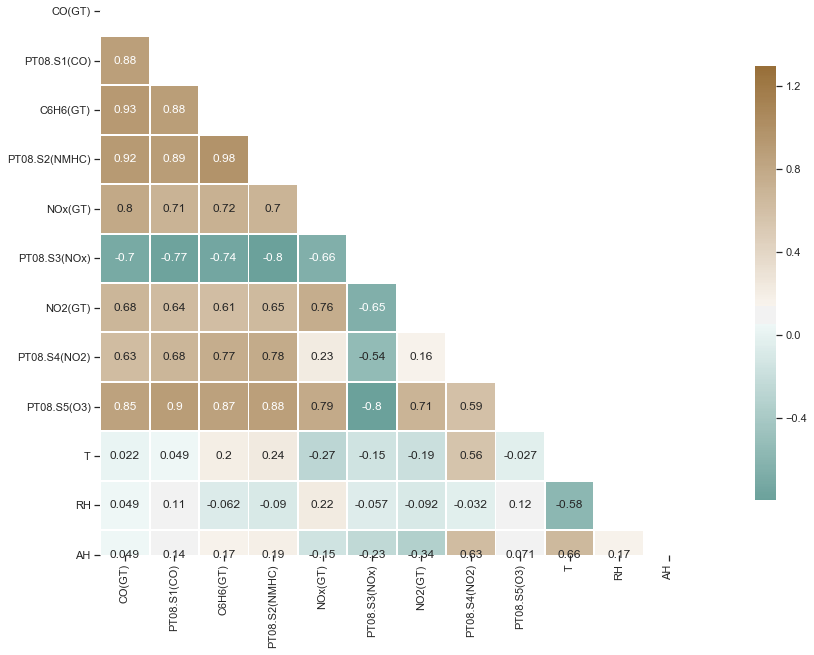

In [20]:
sns.set(style="ticks")

corr = df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(22, 10))
cmap = sns.diverging_palette(180, 50, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.3, center=0.1,annot=True,
            square=True, linewidths=.9, cbar_kws={"shrink": 0.8})

## <span style="color:darkgreen">Step 3. Filling the gaps in variables based on other variables correlated with it</span>
<span style="color:darkblue">Filling gaps in the CO (GT) variable.</span>

I check what this variable is strongly correlated with and supplement based on this variable, if not, I supplement it as the last or next value.

In [21]:
df.corr()


,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
CO(GT),1.000000,0.879288,0.931078,0.915514,0.795028,-0.703446,0.683343,0.630703,0.854182,0.022109,0.048890,0.048556
PT08.S1(CO),0.879288,1.000000,0.883795,0.892964,0.713654,-0.771938,0.641529,0.682881,0.899324,0.048627,0.114606,0.135324
C6H6(GT),0.931078,0.883795,1.000000,0.981950,0.718839,-0.735744,0.614474,0.765731,0.865689,0.198956,-0.061681,0.167972
PT08.S2(NMHC),0.915514,0.892964,0.981950,1.000000,0.704435,-0.796703,0.646245,0.777254,0.880578,0.241373,-0.090380,0.186933
NOx(GT),0.795028,0.713654,0.718839,0.704435,1.000000,-0.655707,0.763111,0.233731,0.787046,-0.269683,0.221032,-0.149323
PT08.S3(NOx),-0.703446,-0.771938,-0.735744,-0.796703,-0.655707,1.000000,-0.652083,-0.538468,-0.796569,-0.145112,-0.056740,-0.232017
NO2(GT),0.683343,0.641529,0.614474,0.646245,0.763111,-0.652083,1.000000,0.157360,0.708128,-0.186533,-0.091759,-0.335022
PT08.S4(NO2),0.630703,0.682881,0.765731,0.777254,0.233731,-0.538468,0.157360,1.000000,0.591144,0.561270,-0.032188,0.629641
PT08.S5(O3),0.854182,0.899324,0.865689,0.880578,0.787046,-0.796569,0.708128,0.591144,1.000000,-0.027172,0.124956,0.070751
T,0.022109,0.048627,0.198956,0.241373,-0.269683,-0.145112,-0.186533,0.561270,-0.027172,1.000000,-0.578621,0.656397


In [22]:
df.dtypes

Date              object
Time              object
CO(GT)           float64
PT08.S1(CO)      float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object

In [23]:
print('missing value in CO(GT): ',df['CO(GT)'].isnull().sum())

missing value in CO(GT):  1683


CO (GT) correlation with other variables.

In [24]:
CORREL = df.corr()
CORREL['CO(GT)'].to_frame().sort_values('CO(GT)')

,CO(GT)
PT08.S3(NOx),-0.703446
T,0.022109
AH,0.048556
RH,0.048890
PT08.S4(NO2),0.630703
NO2(GT),0.683343
NOx(GT),0.795028
PT08.S5(O3),0.854182
PT08.S1(CO),0.879288
PT08.S2(NMHC),0.915514


The largest correlation with CO (GT) occurs for C6H6 (GT) which is quite complete. Based on this variable, I fill in the deficiencies in CO (GT).

In [25]:
df['CO(GT)'] = df.groupby('C6H6(GT)')['CO(GT)'].apply(lambda x: x.ffill().bfill())

In [26]:
print('missing value: ',df['CO(GT)'].isnull().sum())

missing value:  383


In [27]:
df['CO(GT)'] = df.groupby('PT08.S1(CO)')['CO(GT)'].apply(lambda x: x.ffill().bfill())

In [28]:
print('missing value: ',df['CO(GT)'].isnull().sum())

missing value:  370


Now I do simple refilling - the last good value.

In [29]:
df['CO(GT)'].fillna(method='ffill', inplace=True)   

In [30]:
print('missing value: ',df['CO(GT)'].isnull().sum())

missing value:  0


### <span style="color:darkblue">Filling gaps in the variable 'C6H6 (GT)'</span>

In [31]:
print('missing value: ',df['C6H6(GT)'].isnull().sum())

missing value:  366


In [32]:
df['C6H6(GT)'] = df.groupby('CO(GT)')['C6H6(GT)'].apply(lambda x: x.ffill().bfill())

In [33]:
print('missing value: ',df['C6H6(GT)'].isnull().sum())

missing value:  0


### <span style="color:darkblue">Filling gaps in the variable 'NOx(GT)'</span>

In [34]:
print('brakuje wartości: ',df['NOx(GT)'].isnull().sum())

brakuje wartości:  1639


In [35]:
CORREL['NOx(GT)'].to_frame().sort_values('NOx(GT)')

,NOx(GT)
PT08.S3(NOx),-0.655707
T,-0.269683
AH,-0.149323
RH,0.221032
PT08.S4(NO2),0.233731
PT08.S2(NMHC),0.704435
PT08.S1(CO),0.713654
C6H6(GT),0.718839
NO2(GT),0.763111
PT08.S5(O3),0.787046


In [36]:
df['NOx(GT)'] = df.groupby('CO(GT)')['NOx(GT)'].apply(lambda x: x.ffill().bfill())

In [37]:
print('missing value: ',df['NOx(GT)'].isnull().sum())

missing value:  0


## <span style="color:darkblue">Filling gaps in the variable 'C6H6 (GT)'</span>

In [38]:
print('missing value: ',df['NO2(GT)'].isnull().sum())

missing value:  1642


In [39]:
CORREL['NO2(GT)'].to_frame().sort_values('NO2(GT)')

,NO2(GT)
PT08.S3(NOx),-0.652083
AH,-0.335022
T,-0.186533
RH,-0.091759
PT08.S4(NO2),0.157360
C6H6(GT),0.614474
PT08.S1(CO),0.641529
PT08.S2(NMHC),0.646245
CO(GT),0.683343
PT08.S5(O3),0.708128


In [40]:
df['NO2(GT)'] = df.groupby('PT08.S5(O3)')['NO2(GT)'].apply(lambda x: x.ffill().bfill())

In [41]:
df['NO2(GT)'] = df.groupby('CO(GT)')['NO2(GT)'].apply(lambda x: x.ffill().bfill())

In [42]:
print('missing value: ',df['NO2(GT)'].isnull().sum())

missing value:  0


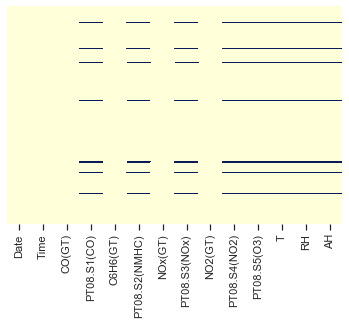

In [43]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')


## <span style="color:darkblue">I complete the records where the entire measuring device did not work.</span>
In the drawing it can be seen as solid lines.

In [44]:
df.shape

(9357, 14)

In [45]:
df.fillna(method='ffill', inplace=True)

In [46]:
df.shape

(9357, 14)

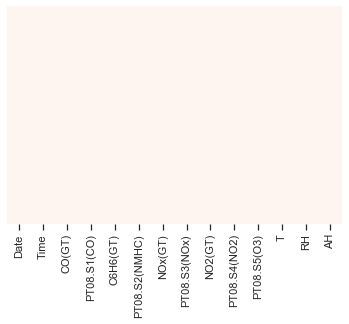

In [47]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='Reds')

In [48]:
df.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

Data have been completed! In the next parts of this tutorial, we will carry out the process of building a linear regression model at TensorFlow.

<span style="color:#f3f3f3">Tutorial: Supplementing data for further analysis</span>

Let's save the completed file to disk

In [53]:
df.to_csv('c:/TF/AirQ_filled.csv')
df2 = pd.read_csv('c:/TF/AirQ_filled.csv')
df2.head(3)

,Unnamed: 0,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,0,10/03/2004,18.00.00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,1,10/03/2004,19.00.00,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2,10/03/2004,20.00.00,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,3,10/03/2004,21.00.00,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,4,10/03/2004,22.00.00,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,9352,04/04/2005,10.00.00,3.1,1314.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,9353,04/04/2005,11.00.00,2.4,1163.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,9354,04/04/2005,12.00.00,2.4,1142.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,9355,04/04/2005,13.00.00,2.1,1003.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139
